# **Kann das Körpergewicht eines Pinguins mit Hilfe seiner Flügellänge vorhergesagt werden?**

### Projektarbeit opencampus.sh Kurs 23S - Mathematik für maschinelles Lernen


- Andreas Gatz
- Sandra Krause
- Anke Schürmann
- Annika Strupp

## **Vorbereitung**

In [526]:
# Lade Python Paket pandas mit Alias pd
import pandas as pd
# Lade Paket numpy mit Alias np
import numpy as np
# Lade matplotlib.pyplot mit Alias plt
import matplotlib.pyplot as plt
# Lade Grafikpaket seaborn mit Alias sns
import seaborn as sns

In [527]:
# Ausgabe der geladenen pandas Version
print(pd.__version__)

1.5.3


### Datensatz einlesen

In [528]:
# Lese CSV Datei penguins_size.csv ein (von Kaggle:
# https://www.kaggle.com/datasets/parulpandey/palmer-archipelago-antarctica-penguin-data
# in Github hochgeladen)
url = 'https://raw.githubusercontent.com/anke-schue/Penguins/main/penguins_lter.csv'
penguins = pd.read_csv(url)

**Daten:** Gorman KB, Williams TD, Fraser WR (2014) Ecological Sexual Dimorphism and Environmental Variability within a Community of Antarctic Penguins (Genus Pygoscelis). PLoS ONE 9(3): e90081. doi:10.1371/journal.pone.0090081

**Datenlizenz:** https://creativecommons.org/publicdomain/zero/1.0/

**Artwork by @allison_horst:** Horst AM, Hill AP, Gorman KB (2020). palmerpenguins: Palmer Archipelago (Antarctica) penguin data. R package version 0.1.0. https://allisonhorst.github.io/palmerpenguins/. doi: 10.5281/zenodo.3960218.

**Artwork Lizenz:** https://allisonhorst.github.io/palmerpenguins/

![allisonhorst.github.io/palmerpenguins/](https://allisonhorst.github.io/palmerpenguins/reference/figures/lter_penguins.png)

In [529]:
# Ausgabe des dataframes penguins (Spalten und Zeilen)
penguins

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,11/16/07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,PAL0910,120,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N38A2,No,12/1/09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
340,PAL0910,121,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N39A1,Yes,11/22/09,46.8,14.3,215.0,4850.0,FEMALE,8.41151,-26.13832,NaN
341,PAL0910,122,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N39A2,Yes,11/22/09,50.4,15.7,222.0,5750.0,MALE,8.30166,-26.04117,NaN
342,PAL0910,123,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N43A1,Yes,11/22/09,45.2,14.8,212.0,5200.0,FEMALE,8.24246,-26.11969,NaN


In [530]:
# Ausgabe von Informationen zu Datentypen der Variablen im dataframe penguins
print(penguins.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   studyName            344 non-null    object 
 1   Sample Number        344 non-null    int64  
 2   Species              344 non-null    object 
 3   Region               344 non-null    object 
 4   Island               344 non-null    object 
 5   Stage                344 non-null    object 
 6   Individual ID        344 non-null    object 
 7   Clutch Completion    344 non-null    object 
 8   Date Egg             344 non-null    object 
 9   Culmen Length (mm)   342 non-null    float64
 10  Culmen Depth (mm)    342 non-null    float64
 11  Flipper Length (mm)  342 non-null    float64
 12  Body Mass (g)        342 non-null    float64
 13  Sex                  334 non-null    object 
 14  Delta 15 N (o/oo)    330 non-null    float64
 15  Delta 13 C (o/oo)    331 non-null    flo

![allisonhorst.github.io/palmerpenguins](https://allisonhorst.github.io/palmerpenguins/reference/figures/culmen_depth.png)

### Vorbereitung der Daten

#### Variablennamen umbennen

In [531]:
# Variablennamen umbennenen zur einfacheren Weiterverarbeitung
# Variablennamen betrachten:
print(penguins.columns)

# kritische Variablen umbennenen
penguins = penguins.rename(columns={'Sample Number': 'sample_number', 'Individual ID': 'Individual_ID',
                                    'Clutch Completion': 'Clutch_completion',
                                    'Date Egg': 'Date_egg',
                                    'Culmen Length (mm)': 'Culmen_length',
                                    'Culmen Depth (mm)': 'Culmen_depth',
                                    'Flipper Length (mm)': 'Flipper_length',
                                    'Body Mass (g)': 'Body_mass',
                                    'Delta 15 N (o/oo)': 'Delta_15N',
                                    'Delta 13 C (o/oo)': 'Delta_13C'})

Index(['studyName', 'Sample Number', 'Species', 'Region', 'Island', 'Stage',
       'Individual ID', 'Clutch Completion', 'Date Egg', 'Culmen Length (mm)',
       'Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)', 'Sex',
       'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)', 'Comments'],
      dtype='object')


#### Datentypen anpassen

In [532]:
# Datentypen: Variablen Species, Island,  in Faktor (numerische "category") umwandeln für spätere Klassifikation
penguins["Species_cat"] = penguins["Species"].astype("category")
penguins["Species_cat"] = penguins["Species_cat"].cat.codes

penguins["Island_cat"] = penguins["Island"].astype("category")
penguins["Island_cat"] = penguins["Island_cat"].cat.codes

penguins["Clutch_completion_cat"] = penguins["Clutch_completion"].astype("category")
penguins["Clutch_completion_cat"] = penguins["Clutch_completion_cat"].cat.codes

penguins["Sex_cat"] = penguins["Sex"].astype("category")
penguins["Sex_cat"] = penguins["Sex_cat"].cat.codes

print("Die Kategorien der neuen Variable Species_cat sind", penguins["Species_cat"].unique())
print("Die Kategorien der neuen Variable Island_cat sind", penguins["Island_cat"].unique())
print("Die Kategorien der neuen Variable Clutch_completion_cat sind", penguins["Clutch_completion_cat"].unique())
print("Die Kategorien der neuen Variable Sex_cat sind", penguins["Sex_cat"].unique(),"\n")

print("Die Variable Geschlecht hat 4 Kategorien, abgesehen von nan also eine zu viel. \nEine genauere Betrachtung liefert folgende Kategorien:"
,penguins.Sex.unique())


Die Kategorien der neuen Variable Species_cat sind [0 1 2]
Die Kategorien der neuen Variable Island_cat sind [2 0 1]
Die Kategorien der neuen Variable Clutch_completion_cat sind [1 0]
Die Kategorien der neuen Variable Sex_cat sind [ 2  1 -1  0] 

Die Variable Geschlecht hat 4 Kategorien, abgesehen von nan also eine zu viel. 
Eine genauere Betrachtung liefert folgende Kategorien: ['MALE' 'FEMALE' nan '.']


#### Zeilen mit fehlenden Werten löschen

In [533]:
# Lösche Spalte mit Kommentaren (viele fehlende Werte)
penguins = penguins.drop("Comments", axis=1)

# Verwerfe alle Zeilen mit fehlenden Werten (missing values, NA)
dropna_penguins = penguins.dropna()

# Lösche Zeile mit Wert '.' für Geschlecht
dropna_penguins = dropna_penguins.drop(dropna_penguins[dropna_penguins.Sex_cat==0].index)
print("Es bleiben noch",dropna_penguins.shape[0], "Beobachtungen der urspruenglich", penguins.shape[0], "Beobachtungen erhalten.")

Es bleiben noch 324 Beobachtungen der urspruenglich 344 Beobachtungen erhalten.


## **Deskriptive Statistik - Datensatz beschreiben**

### Lage- und Streuungsmaße

In [534]:
# Zusammenfassung der Variablen im dataframe: Lage- und Streuungsmaße
# nominale Daten:
penguins.describe(include='object')

,studyName,Species,Region,Island,Stage,Individual_ID,Clutch_completion,Date_egg,Sex
count,344,344,344,344,344,344,344,344,334
unique,3,3,1,3,1,190,2,50,3
top,PAL0910,Adelie Penguin (Pygoscelis adeliae),Anvers,Biscoe,"Adult, 1 Egg Stage",N61A2,Yes,11/27/07,MALE
freq,120,152,344,168,344,3,308,18,168


Hierbei gibt **unique** die Anzahl an Kategorien je Variable an. **top** enthält den Modus.

In [535]:
# Zusammenfassung der Variablen im dataframe: Lage- und Streuungsmaße
# metrische Daten:
penguins.describe()

,sample_number,Culmen_length,Culmen_depth,Flipper_length,Body_mass,Delta_15N,Delta_13C,Species_cat,Island_cat,Clutch_completion_cat,Sex_cat
count,344.000000,342.000000,342.000000,342.000000,342.000000,330.000000,331.000000,344.000000,344.000000,344.000000,344.000000
mean,63.151163,43.921930,17.151170,200.915205,4201.754386,8.733382,-25.686292,0.918605,0.662791,0.895349,1.427326
std,40.430199,5.459584,1.974793,14.061714,801.954536,0.551770,0.793961,0.893320,0.726194,0.306549,0.652832
min,1.000000,32.100000,13.100000,172.000000,2700.000000,7.632200,-27.018540,0.000000,0.000000,0.000000,-1.000000
25%,29.000000,39.225000,15.600000,190.000000,3550.000000,8.299890,-26.320305,0.000000,0.000000,1.000000,1.000000
50%,58.000000,44.450000,17.300000,197.000000,4050.000000,8.652405,-25.833520,1.000000,1.000000,1.000000,1.000000
75%,95.250000,48.500000,18.700000,213.000000,4750.000000,9.172123,-25.062050,2.000000,1.000000,1.000000,2.000000
max,152.000000,59.600000,21.500000,231.000000,6300.000000,10.025440,-23.787670,2.000000,2.000000,1.000000,2.000000


Die obige Tabelle gibt einen Überblick über wichtige Lage- und Streuungsmaße. So können mit dem Mittelwert (**mean**), Median (**50%**), Quartile (**25%** und **75%**), Minimum (**min**) und Maximum (**max**) alle wichtigen Lagemaße und mit der Standardabweichung (**std**) auch die Streuung abgelesen werden.

### Korrelation zwischen den Variablen

In [536]:
# Überprüfung auf Korrelation zwischen numerischen Variablen:
# Nutze Methode corr(), um Korrelation zwischen numerischen Spalten abzubilden
# corr() ignoriert nicht-numerische Spalten
A_corr = dropna_penguins.corr(numeric_only = True)


# Finde Variablen mit hoher Korrelation (|rxy|>0.6)
# Ausgabe: Variablennamen, Korrelationskoeffizient

# Erhalte Kombinationen an Variablen mit einer Korrelation > 0.6
A_high_corr = A_corr.to_numpy()
A_high_corr = np.absolute(A_high_corr)
A_high_corr = np.triu(A_high_corr, k = 1)

indices = np.transpose(np.nonzero(A_high_corr > 0.6))
A_high_corr_values = A_high_corr[A_high_corr>0.6]

print("Es besteht eine hohe Korrelation für folgende Variablenpaare:\n")
for i in range(indices.shape[0]):
  #print(iloc.A_corr[indices[i][0],indices[i][1]])
  a = A_corr.columns[indices[i][0]]
  b = A_corr.columns[indices[i][1]]
  c = A_high_corr_values[i]
  print(a, "und", b, "mit einem Korrelationskoeffizienten von", np.round(c,3))

Es besteht eine hohe Korrelation für folgende Variablenpaare:

Culmen_length und Flipper_length mit einem Korrelationskoeffizienten von 0.649
Culmen_length und Species_cat mit einem Korrelationskoeffizienten von 0.728
Culmen_depth und Species_cat mit einem Korrelationskoeffizienten von 0.739
Flipper_length und Body_mass mit einem Korrelationskoeffizienten von 0.877
Flipper_length und Species_cat mit einem Korrelationskoeffizienten von 0.848
Body_mass und Species_cat mit einem Korrelationskoeffizienten von 0.751
Species_cat und Island_cat mit einem Korrelationskoeffizienten von 0.614


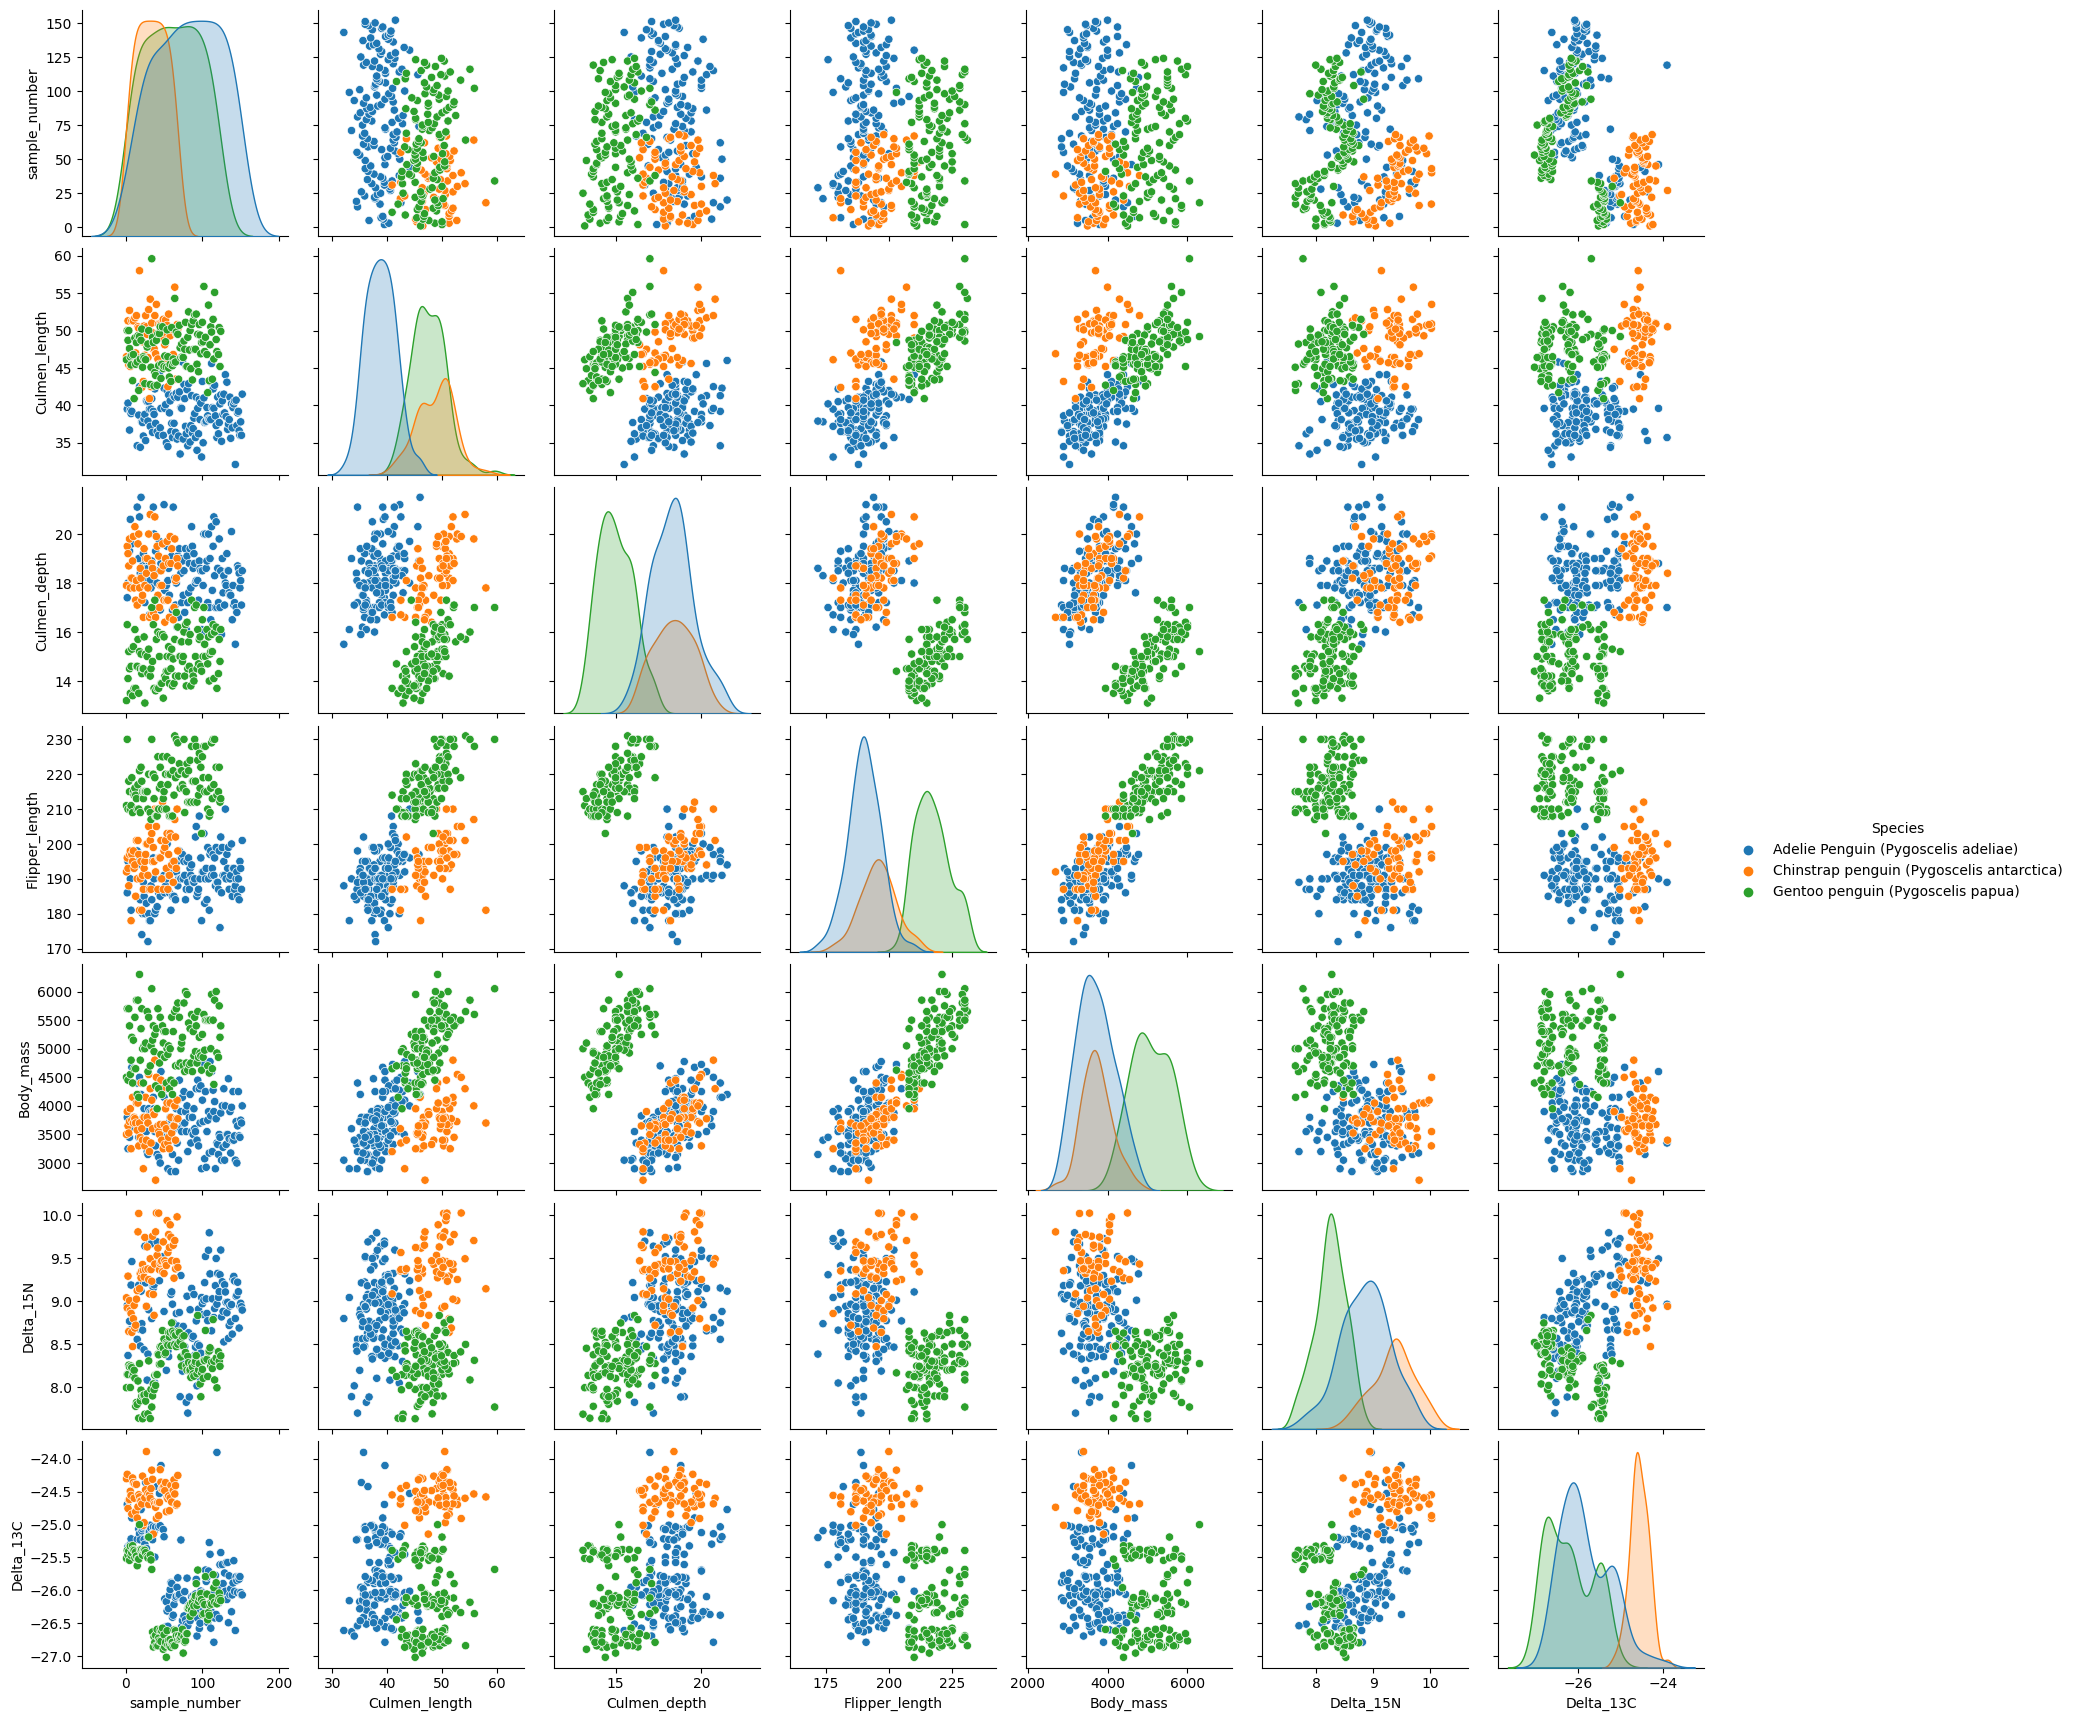

In [537]:
# Visualisierung: Scatterplot-Matrix -> Kategorisierung nach Spezies
sns.pairplot(dropna_penguins.loc[:, ~dropna_penguins.columns.isin(['Species_cat','Sex_cat','Island_cat',
                                                                   'Clutch_completion_cat'])],hue = "Species")

Die Grafik liefert einen Überblick über den Zusammenhang von je zwei metrischen Variablen. Die einzelnen Punkte in den Scatterplots sind je nach Spezies in der entsprechenden Farbe eingezeichnet. Falls in einem Plot die einzelnen Farbbereiche besonders gut zu trennen sind, eignet sich die entsprechende Kombination gut zur Vorhersage der Spezieszugehörigkeit.

## **Neuronales Netz mit kNN-Klassifikation testen**

In [538]:
# Lade Module für kNN-Klassifikation
# https://scikit-learn.org/stable/modules/neighbors.html
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
import sklearn.neighbors
from sklearn.model_selection import train_test_split

### Vorbereitung der Daten

In [539]:
# Wähle Anzahl k der nearest neighbors
# -> mit unterschiedlichen Werten für k experimentieren
# Vergleich der mittleren Genauigkeit zur Bewertung des Modells für verschiedene Werte für k
# Referenzwert: mit k = 3, 0.9629629629629629

k = 3

In [540]:
# Teile dataset auf in Klassenattribute (y) und features (X)
# Die höchste Korrelation der Variable y= Species_cat besteht mit den Variablen:
# Flipper_length, Body_mass (zur Klassifizierung nicht geeignet), Culmen_depth, Culmen_length
# Verwende Culmen_length, Flipper_length und Culmen_depth für die Klassifikation

X = dropna_penguins[["Culmen_length","Flipper_length","Culmen_depth"]]
y = dropna_penguins["Species_cat"]

(30.0, 65.0)

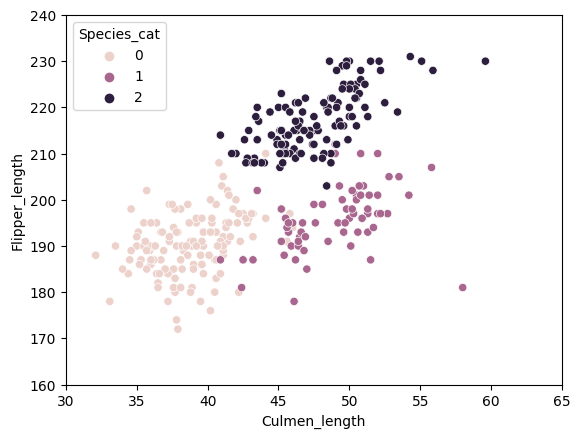

In [541]:
# Betrachtung Scatterplot Culmen_length und Flipper_length kategorisiert nach Spezies
sns.scatterplot(data = dropna_penguins, x = "Culmen_length", y = "Flipper_length", hue = "Species_cat")

# Setze Limits für x- und y-Achse
plt.ylim(160, 240)
plt.xlim(30, 65)

In [542]:
X

,Culmen_length,Flipper_length,Culmen_depth
1,39.5,186.0,17.4
2,40.3,195.0,18.0
4,36.7,193.0,19.3
5,39.3,190.0,20.6
6,38.9,181.0,17.8
...,...,...,...
338,47.2,214.0,13.7
340,46.8,215.0,14.3
341,50.4,222.0,15.7
342,45.2,212.0,14.8


#### Aufteilung in Trainings- und Testdaten

In [543]:
# Teile X und y in train und test set mit train_test_split
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
# Default für test size ist 0.25*n

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 19)

(30.0, 65.0)

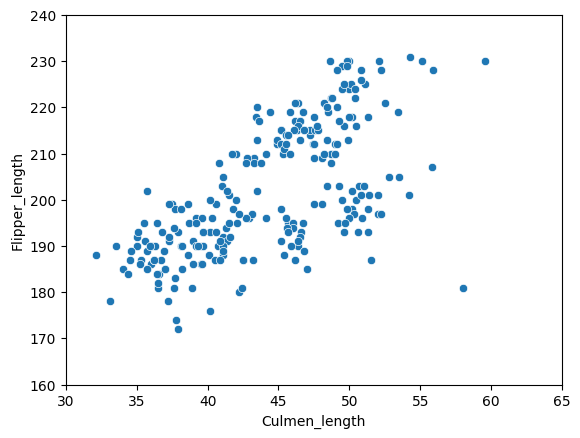

In [544]:
sns.scatterplot(data = X_train, x = "Culmen_length", y = "Flipper_length")

# Setze identische Limits für x- und y-Achse (Vergleichbarkeit!)
plt.ylim(160, 240)
plt.xlim(30, 65)

(30.0, 65.0)

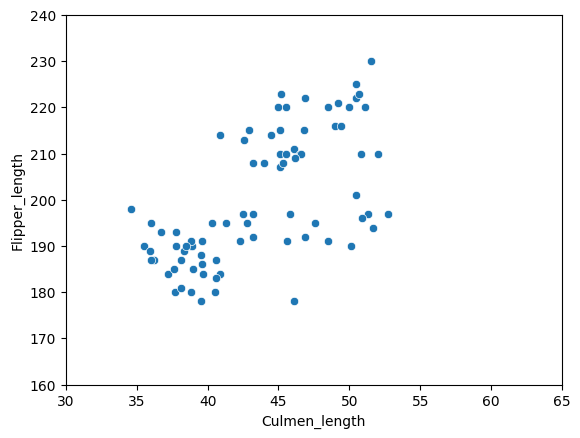

In [545]:
sns.scatterplot(data = X_test, x = "Culmen_length", y = "Flipper_length")

# Setze identische Limits für x- und y-Achse (Vergleichbarkeit!)
plt.ylim(160, 240)
plt.xlim(30, 65)

### Modell erstellen und schätzen

In [546]:
# Speicher KNeighborsClassifier in Variable clf
clf = KNeighborsClassifier(n_neighbors = k)

# Trainiere Modell mit clf.fit()
model_1 = clf.fit(X_train, y_train)

In [547]:
# Schätze mit Modell die Klassenattribute für die X_test Testdaten
y_estimation = clf.predict(X_test)
y_estimation

array([0, 2, 0, 1, 0, 1, 0, 0, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0,
       2, 2, 0, 1, 1, 2, 2, 0, 1, 0, 2, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       2, 1, 1, 2, 2, 0, 2, 0, 2, 1, 1, 0, 2, 2, 0, 1, 1, 0, 0, 0, 0, 2,
       0, 2, 1, 0, 2, 2, 2, 2, 0, 2, 1, 0, 0, 0, 0], dtype=int8)

### Evaluation kNN-Klassifikation

In [548]:
# Das Modell bewerten mit clf.score(): gibt die mittlere Genauigkeit bei der Schätzung der Testdaten an
mean_accuracy = clf.score(X_test, y_test)
print("Die mittlere Genauigkeit bei der Klassifizierung der Testdaten liegt bei", mean_accuracy)

Die mittlere Genauigkeit bei der Klassifizierung der Testdaten liegt bei 0.9629629629629629


## Lineare Regression

In [549]:
# Lade Module für lineare Regression
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model

<Axes: xlabel='Flipper_length', ylabel='Body_mass'>

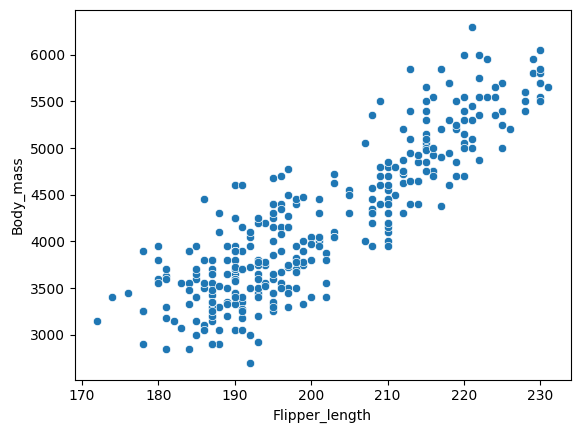

In [550]:
# Scatterplot der Variablen Flügellänge und Gewicht pro Pinguin
# Punktwolke in zweidimensionalen Koordinatensystem
sns.scatterplot(data = dropna_penguins, x = "Flipper_length", y = "Body_mass")

In [551]:
# Vermutung eines linearen Zusammenhangs: erneute Berechnung des Korrelationskoeffizienten
dropna_penguins['Body_mass'].corr(dropna_penguins['Flipper_length'])

0.8770661088800552

### Klassische Berechnungen einer linearen Regression:

Im Folgenden soll auf verschieden Methoden zur Berechnung einer linearen Regression eingegangen werden. Hierzu werden die klassiche Berechnung mit Hilfe von Matrizen, die Berechnung mit Hilfe von numpy Funktionen und die gradient descent Methode herangezogen werden.

#### Berechnung mit Hilfe von Matrizen

Es soll eine einfache lineare Regression mit endogener Variable Y = Körpergewicht und exogener Variable X = Flügellänge betrachtet werden.

Die entsprechende Formel für den vermuteten Zusammenhang lautet:

<center> $y_i = b_0 + b_1 x_i+u_i$   $∀ i ∈ \{1, \dots, n\}$ </center>


Hierbei bezeichnet $b_0$ den y-Achsenabschnitt und $b_1$ die Steigung der Regressionsgeraden. $u_i$ gibt den zugehörigen Fehlerterm an.

In Matrixschreibweise ergibt sich:
$Y = Xb+u$
<center>
mit:
$Y =
 \begin{pmatrix}
  y_1 \\
  \vdots\\
  y_n
 \end{pmatrix}$,
$X =
 \begin{pmatrix}
  1 & x_1 \\
  \vdots & \vdots\\
  1 & x_n
 \end{pmatrix}$ und
$b =
 \begin{pmatrix}
  b_0 \\
  b_1
 \end{pmatrix}$.
</center>

Die Schätzgleichung lautet $\hat{Y} = X\hat{b}$.

Eine klassische Lösungsmethode ist OLS (ordinary least squares), welche die Summe der Fehlerquadrate minimiert. Es gilt:

<center> $\hat{b} = (X'X)^{-1}X'Y$ </center>

In [552]:
# Erzeuge Variablen X und Y
# für X muss die Flügellängenspalte mit einer Vektor aus 1en kombiniert werden
X_0 = dropna_penguins["Flipper_length"].to_numpy()
X = np.concatenate((np.ones(X_0.shape[0]),X_0)).reshape((-1,2),order='F')

Y = dropna_penguins["Body_mass"].to_numpy()

In [553]:
# Berechnung mit Hilfe von Matrizenmultiplikation
b_mat = np.matmul(np.linalg.inv(np.matmul(np.transpose(X),X)),np.matmul(np.transpose(X),Y))
print("Als Regressionskoeffizienten ergeben sich b\u2080=", b_mat[0], "und b\u2081=", b_mat[1],".")
print("Die Regressionsgerade hat die Form: \n y =",b_mat[0],"+",b_mat[1],"x")


Als Regressionskoeffizienten ergeben sich b₀= -6017.738670191153 und b₁= 50.849347012637686 .
Die Regressionsgerade hat die Form: 
 y = -6017.738670191153 + 50.849347012637686 x


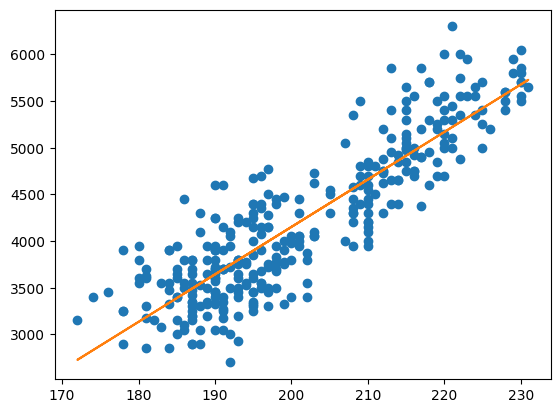

In [554]:
# Grafische Darstellung:
plt.plot(X_0, Y, "o", color = "tab:blue")
plt.plot(X_0, b_mat[0]+b_mat[1]*X_0, color = "tab:orange")

#### Berechnung mit Hilfe von numpy Funktionen

In [555]:
# Lade Modell
from sklearn.linear_model import LinearRegression

In [556]:
# Erstelle und optimiere das Modell

model = LinearRegression().fit(X_0.reshape((-1,1)), Y)

# b_1 ist die Steigung der Geraden
# b_0 ist der Schnittpunkt der Geraden mit der y-Achse

b_0 = model.intercept_
b_1 = model.coef_
r_sq = model.score(X_0.reshape((-1,1)), Y)

print("Die Steigung ist b\u2081 =",b_1[0])
print("Der y-Achsenabschnitt ist b\u2080 =",b_0,"\n")
print("Der kleinste beobachtete Wert der Flügellänge beträgt 172mm, der Mittelwert liegt sogar bei 201mm.\nEine lineare Regression kann nicht sinnvoll auf Daten außerhalb des beobachteten Bereich extrapoliert werden. \nEs lässt sich zwar theoretisch ein geschätztes Gewicht für Flügellänge 0 berechnen. \nIn diesem Bereich besteht jedoch kein linearer Zusammenhang mehr und eine Berechnung ist nicht sinnvoll möglich. \nSomit ist der Wert von b rein von theoretischem Wert.\n")
print("Das R\u00b2 beträgt",r_sq)

Die Steigung ist b₁ = 50.849347012638006
Der y-Achsenabschnitt ist b₀ = -6017.738670191118 

Der kleinste beobachtete Wert der Flügellänge beträgt 172mm, der Mittelwert liegt sogar bei 201mm.
Eine lineare Regression kann nicht sinnvoll auf Daten außerhalb des beobachteten Bereich extrapoliert werden. 
Es lässt sich zwar theoretisch ein geschätztes Gewicht für Flügellänge 0 berechnen. 
In diesem Bereich besteht jedoch kein linearer Zusammenhang mehr und eine Berechnung ist nicht sinnvoll möglich. 
Somit ist der Wert von b rein von theoretischem Wert.

Das R² beträgt 0.7692449593460002


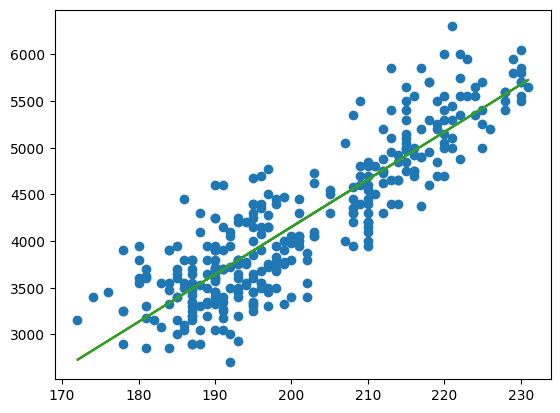

In [557]:
# Eintrag der Ausgleichgeraden in das Koordinatensystem
plt.plot(X_0, Y, "o", color = "tab:blue")
plt.plot(X_0, b_mat[0]+b_mat[1]*X_0, color = "tab:orange")
plt.plot(X_0, b_1*X_0+b_0, color = "tab:green")

#### Erstellung der Regressionsgerade mit Seaborn

<Axes: >

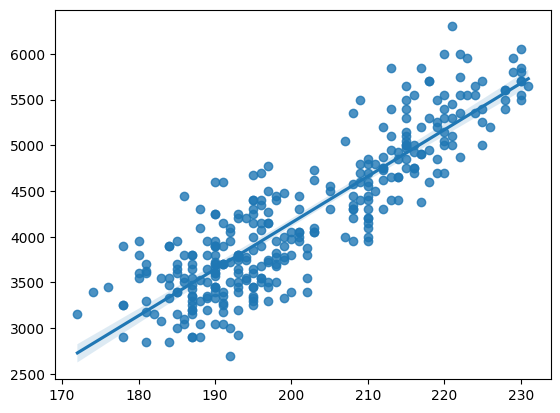

In [558]:
# Alternative: modelliere lineare Regression mit Python Paket seaborn
# https://seaborn.pydata.org/generated/seaborn.regplot.html

sns.regplot(x = X_0, y = Y)

### Lineare Regression mit Gradient Descent Verfahren

#### Definieren der benötigten Funktionen

In [559]:
# Funktion E zur Berechnung der Kostenfunktion
def E(m, b, X, Y):
    costs = 1/(2*len(Y))*np.sum((m*X + b - Y)**2)
    cost_1.append(costs)
    return costs

In [560]:
# Funktion zur Berechnung der partiellen Ableitungen der Kostenfunktion
def dEdm(m, b, X, Y):
    res = 1/len(X)*np.dot(m*X+b-Y,X)
    return res

def dEdb(m, b, X, Y):
    res = 1/len(X) * np.sum(m*X+b-Y)
    return res

In [561]:
# Funktion zur Ermittlung des Gradient descent
def gradient_descent(dEdm, dEdb, m, b, X, Y, learning_rate, num_iterations, print_cost=False):
    for iteration in range(num_iterations):
        m_new = m -learning_rate * dEdm(m,b,X,Y)
        b_new = b -learning_rate * dEdb(m,b,X,Y)
        m = m_new
        b = b_new
        if print_cost:
            print (f"Kosten nach Iteration {iteration}: {E(m, b, X, Y)}")
    return m, b

#### Vorbereiten der Daten

In [562]:
# Standardisieren der Werte in X und Y
X_norm = (X_0 - np.mean(X_0))/np.std(X_0)
Y_norm = (Y - np.mean(Y))/np.std(Y)

In [563]:
# Erzeuge leere Liste als Speicherort für Kostenfunktion
cost_1 = []

#### Wahl der Anzahl an Iterationen

Wie hängt die Anzahl der Iterationen/Wert der Kostenfunktion von der
Lernrate ab?
Berechnung mit unterschiedlicher Anzahl an Iterationen

##### Anzahl an Iterationen zu klein gewählt

In [564]:
# Setze Parameter: Anzahl an Iterationen = 5
m_initial = 0; b_initial = 0; num_iterations = 5; learning_rate = 0.2

# Führe Gradient descent Verfahren durch
m_gd, b_gd = gradient_descent(dEdm, dEdb, m_initial, b_initial,
                              X_norm, Y_norm, learning_rate, num_iterations, print_cost=True)

print(f"\nErgebnis des Gradient descent Verfahrens:\nm_opt = ", m_gd, "\nb_opt = ", b_gd)
print("\nDie zugehörige Regressionsgerade hat die Form \ny = ", b_gd, " + ", m_gd," x ")

Kosten nach Iteration 0: 0.36153590731771995
Kosten nach Iteration 1: 0.2729188880010607
Kosten nach Iteration 2: 0.21620399563839873
Kosten nach Iteration 3: 0.17990646452629513
Kosten nach Iteration 4: 0.15667604461454882

Ergebnis des Gradient descent Verfahrens:
m_opt =  0.5896690863222385 
b_opt =  9.649345794272964e-17

Die zugehörige Regressionsgerade hat die Form 
y =  9.649345794272964e-17  +  0.5896690863222385  x 


In [565]:
# Test der Regression an ausgewählten x-Werten
X_pred = np.array([170,180,190,200,210,220,220,230])

# Funktion zur Anwendung der Regressionsergebnisse auf die Testdaten X_pred
def test_regression(X_pred=X_pred,m_gd=m_gd,b_gd=b_gd):
    # Standardisiere den Trainingsvektor X
    X_pred_stand = (X_pred - np.mean(X_0))/np.std(X_0)
    Y_pred_gd_stand = m_gd * X_pred_stand + b_gd

    # Standardisiere den Trainingsvektor Y
    Y_pred_gd = Y_pred_gd_stand * np.std(Y) + np.mean(Y)

    print(f"Flügellänge:\n{X_pred}")
    print(f"Vorhersage des Körpergewichts:\n{Y_pred_gd}")
    return(Y_pred_gd)

# Ausgabe der Werte:
t_result_5 = test_regression(X_pred,m_gd,b_gd)

Flügellänge:
[170 180 190 200 210 220 220 230]
Vorhersage des Körpergewichts:
[3146.78193952 3488.65226936 3830.52259919 4172.39292903 4514.26325886
 4856.1335887  4856.1335887  5198.00391853]


In [566]:
# Vergleich der Testdaten mit dem beobachteten Mittelwert in dem entsprechenden Bereich
def test_table(X_pred=X_pred,Y_pred_gd=Y_pred_gd):
    x = 0
    A=pd.DataFrame(columns=['Vergleichsbereich','Mittelwert des Bereichs','geschätzter Wert'])
    for i in X_pred:
        mean_x = dropna_penguins[dropna_penguins['Flipper_length'].between(i-5, i+5)]['Body_mass'].mean().round(2)
        y_hat = Y_pred_gd[x].round(2)
        A.loc[x] = [[i-5,i+5],mean_x,y_hat]
        x+=1
    print(A)

# Tabelle zum Vergleich der Werte:
test_table(X_pred,t_result_5)

  Vergleichsbereich  Mittelwert des Bereichs  geschätzter Wert
0        [165, 175]                  3275.00           3146.78
1        [175, 185]                  3453.91           3488.65
2        [185, 195]                  3619.07           3830.52
3        [195, 205]                  3956.60           4172.39
4        [205, 215]                  4706.25           4514.26
5        [215, 225]                  5243.33           4856.13
6        [215, 225]                  5243.33           4856.13
7        [225, 235]                  5589.47           5198.00


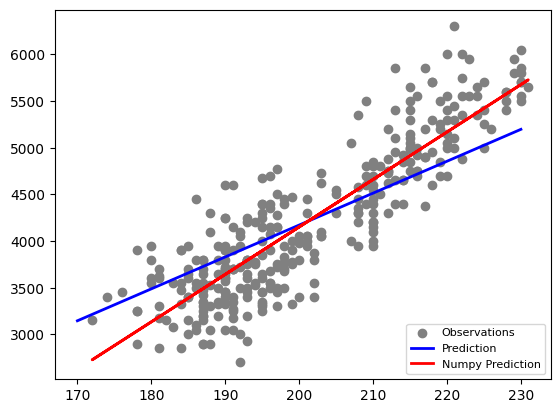

In [567]:
# Grafischer Vergleich mit und ohne Gradient descent:

def plot_compare(X_0=X_0,Y=Y,X_pred=X_pred,Y_pred_gd=Y_pred_gd,b_0=b_0,b_1=b_1):
  plt.scatter(X_0, Y,color='grey')

  # Gradient descent Regressionslinie in blau
  plt.plot(X_pred, Y_pred_gd,color='blue', linewidth=2)

  # Regressionsgerade mit Numpy in rot
  plt.plot(X_0, b_1*X_0+b_0, color='red',  linewidth=2)
  plt.legend(('Observations','Prediction', 'Numpy Prediction'),
           scatterpoints=1,
           loc='lower right',
           fontsize=8)
  return(plt.show())

plot_compare(Y_pred_gd=t_result_5)

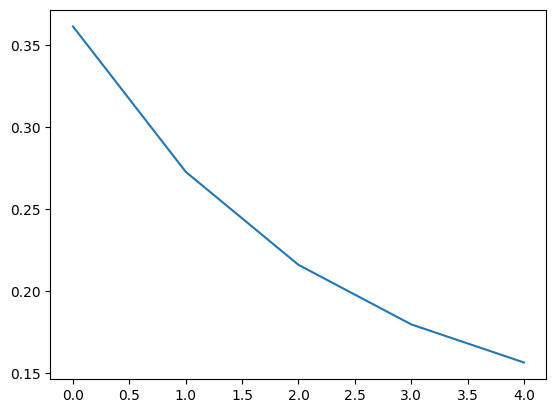

In [568]:
# Entwicklung der Kostenfunktion
plt.plot(cost_1)
plt.show()

cost_1 = []

Falls die Anzahl an Iterationen zu klein gewählt wird, ist die Schätzung nicht sonderlich gut. Dies kann sowohl an der Regressionslinie als auch an der noch fehlenden Konvergenz der Kostenfunktion erkannt werden.

##### Anzahl an Iterationen gut gewählt

In [569]:
# Setze Parameter: Anzahl an Iterationen = 15
m_initial = 0; b_initial = 0; num_iterations = 15; learning_rate = 0.2

# Führe Gradient descent Verfahren durch
m_gd, b_gd = gradient_descent(dEdm, dEdb, m_initial, b_initial,
                              X_norm, Y_norm, learning_rate, num_iterations, print_cost=True)

print(f"\nErgebnis des Gradient descent Verfahrens:\nm_opt = ", m_gd, "\nb_opt = ", b_gd)
print("\nDie zugehörige Regressionsgerade hat die Form \ny = ", b_gd, " + ", m_gd," x ")

Kosten nach Iteration 0: 0.36153590731771995
Kosten nach Iteration 1: 0.2729188880010607
Kosten nach Iteration 2: 0.21620399563839873
Kosten nach Iteration 3: 0.17990646452629513
Kosten nach Iteration 4: 0.15667604461454882
Kosten nach Iteration 5: 0.14180857587103116
Kosten nach Iteration 6: 0.13229339587517988
Kosten nach Iteration 7: 0.12620368067783505
Kosten nach Iteration 8: 0.12230626295153436
Kosten nach Iteration 9: 0.11981191560670192
Kosten nach Iteration 10: 0.11821553330600919
Kosten nach Iteration 11: 0.1171938486335658
Kosten nach Iteration 12: 0.11653997044320205
Kosten nach Iteration 13: 0.11612148840136925
Kosten nach Iteration 14: 0.11585365989459624

Ergebnis des Gradient descent Verfahrens:
m_opt =  0.8462070885587148 
b_opt =  1.737978759536665e-16

Die zugehörige Regressionsgerade hat die Form 
y =  1.737978759536665e-16  +  0.8462070885587148  x 


In [570]:
# Test der Regression an ausgewählten x-Werten X_pred
t_result_15 = test_regression(X_pred,m_gd,b_gd)

Flügellänge:
[170 180 190 200 210 220 220 230]
Vorhersage des Körpergewichts:
[2682.49902913 3173.1014758  3663.70392247 4154.30636914 4644.90881581
 5135.51126248 5135.51126248 5626.11370915]


In [571]:
# Tabelle zum Vergleich der Werte:
test_table(X_pred,t_result_15)

  Vergleichsbereich  Mittelwert des Bereichs  geschätzter Wert
0        [165, 175]                  3275.00           2682.50
1        [175, 185]                  3453.91           3173.10
2        [185, 195]                  3619.07           3663.70
3        [195, 205]                  3956.60           4154.31
4        [205, 215]                  4706.25           4644.91
5        [215, 225]                  5243.33           5135.51
6        [215, 225]                  5243.33           5135.51
7        [225, 235]                  5589.47           5626.11


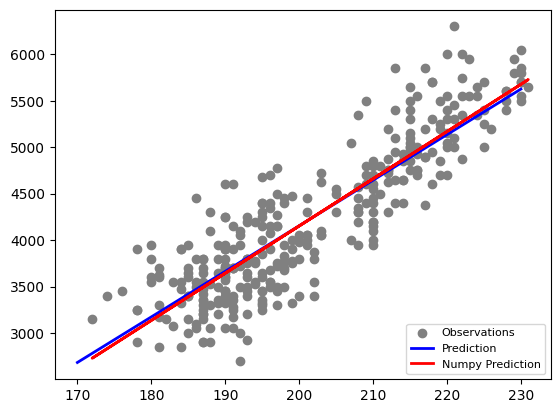

In [572]:
# Grafischer Vergleich mit und ohne Gradient descent:
plot_compare(Y_pred_gd=t_result_15)

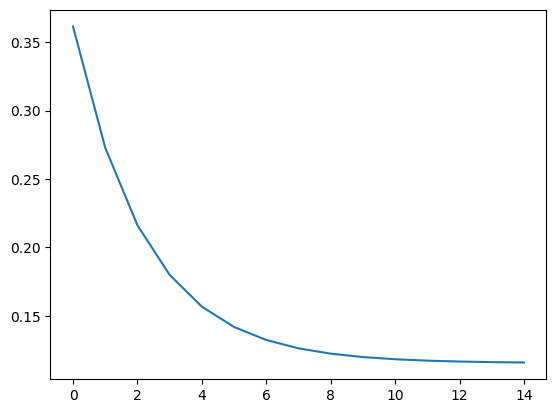

In [573]:
# Entwicklung der Kostenfunktion
plt.plot(cost_1)
plt.show()

cost_1 = []

##### Anzahl an Iterationen zu groß gewählt



In [574]:
# Setze Parameter: Anzahl an Iterationen = 200
m_initial = 0; b_initial = 0; num_iterations = 200; learning_rate = 0.2

# Führe Gradient descent Verfahren durch
m_gd, b_gd = gradient_descent(dEdm, dEdb, m_initial, b_initial,
                              X_norm, Y_norm, learning_rate, num_iterations, print_cost=True)

print(f"\nErgebnis des Gradient descent Verfahrens:\nm_opt = ", m_gd, "\nb_opt = ", b_gd)
print("\nDie zugehörige Regressionsgerade hat die Form \ny = ", b_gd, " + ", m_gd," x ")

Kosten nach Iteration 0: 0.36153590731771995
Kosten nach Iteration 1: 0.2729188880010607
Kosten nach Iteration 2: 0.21620399563839873
Kosten nach Iteration 3: 0.17990646452629513
Kosten nach Iteration 4: 0.15667604461454882
Kosten nach Iteration 5: 0.14180857587103116
Kosten nach Iteration 6: 0.13229339587517988
Kosten nach Iteration 7: 0.12620368067783505
Kosten nach Iteration 8: 0.12230626295153436
Kosten nach Iteration 9: 0.11981191560670192
Kosten nach Iteration 10: 0.11821553330600919
Kosten nach Iteration 11: 0.1171938486335658
Kosten nach Iteration 12: 0.11653997044320205
Kosten nach Iteration 13: 0.11612148840136925
Kosten nach Iteration 14: 0.11585365989459624
Kosten nach Iteration 15: 0.11568224965026154
Kosten nach Iteration 16: 0.11557254709388733
Kosten nach Iteration 17: 0.11550233745780783
Kosten nach Iteration 18: 0.11545740329071694
Kosten nach Iteration 19: 0.11542864542377879
Kosten nach Iteration 20: 0.11541024038893834
Kosten nach Iteration 21: 0.11539846116664046


In [575]:
# Test der Regression an ausgewählten x-Werten X_pred
t_result_200 = test_regression(X_pred,m_gd,b_gd)

Flügellänge:
[170 180 190 200 210 220 220 230]
Vorhersage des Körpergewichts:
[2626.65032196 3135.14379208 3643.63726221 4152.13073234 4660.62420246
 5169.11767259 5169.11767259 5677.61114272]


In [576]:
# Tabelle zum Vergleich der Werte:
test_table(X_pred,t_result_200)

  Vergleichsbereich  Mittelwert des Bereichs  geschätzter Wert
0        [165, 175]                  3275.00           2626.65
1        [175, 185]                  3453.91           3135.14
2        [185, 195]                  3619.07           3643.64
3        [195, 205]                  3956.60           4152.13
4        [205, 215]                  4706.25           4660.62
5        [215, 225]                  5243.33           5169.12
6        [215, 225]                  5243.33           5169.12
7        [225, 235]                  5589.47           5677.61


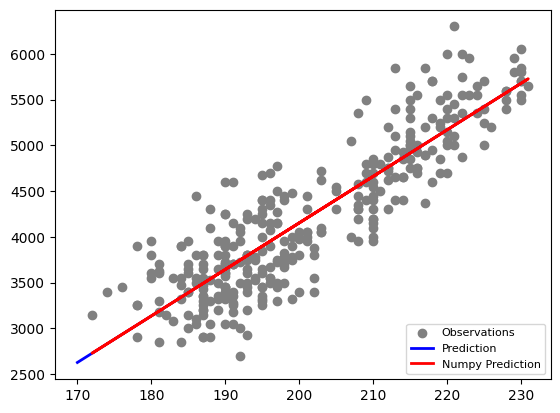

In [577]:
# Grafischer Vergleich mit und ohne Gradient descent:
plot_compare(Y_pred_gd=t_result_200)

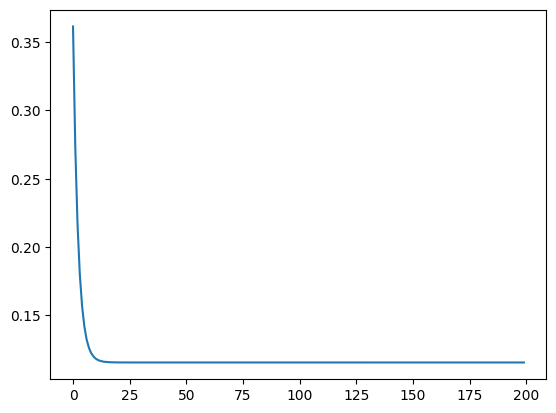

In [578]:
# Entwicklung der Kostenfunktion
plt.plot(cost_1)
plt.show()

cost_1 = []

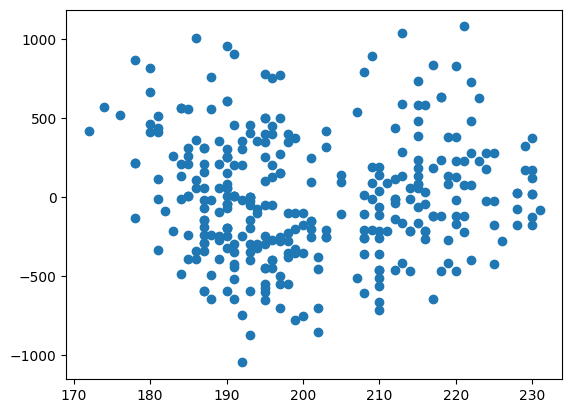

In [579]:
# Residuenplot
plt.scatter(X_0, Y-(b_1*X_0+b_0))

### Wahl der Schrittweite/Learning Rate:

#### Schrittweite zu klein gewählt:

In [580]:
# Setze Parameter: Learning Rate: 0.001, Anzahl an Iterationen = 50
m_initial = 0; b_initial = 0; num_iterations = 50; learning_rate = 0.001

# Führe Gradient descent Verfahren durch
m_gd, b_gd = gradient_descent(dEdm, dEdb, m_initial, b_initial,
                              X_norm, Y_norm, learning_rate, num_iterations, print_cost=True)

print(f"\nErgebnis des Gradient descent Verfahrens:\nm_opt = ", m_gd, "\nb_opt = ", b_gd)
print("\nDie zugehörige Regressionsgerade hat die Form \ny = ", b_gd, " + ", m_gd," x ")

Kosten nach Iteration 0: 0.4992311396631335
Kosten nach Iteration 1: 0.4984638162780806
Kosten nach Iteration 2: 0.4976980267724745
Kosten nach Iteration 3: 0.49693376808008993
Kosten nach Iteration 4: 0.4961710371408315
Kosten nach Iteration 5: 0.4954098309007206
Kosten nach Iteration 6: 0.49465014631188375
Kosten nach Iteration 7: 0.49389198033254
Kosten nach Iteration 8: 0.49313532992698894
Kosten nach Iteration 9: 0.4923801920655986
Kosten nach Iteration 10: 0.4916265637247932
Kosten nach Iteration 11: 0.49087444188704094
Kosten nach Iteration 12: 0.4901238235408424
Kosten nach Iteration 13: 0.48937470568071795
Kosten nach Iteration 14: 0.4886270853071958
Kosten nach Iteration 15: 0.48788095942680043
Kosten nach Iteration 16: 0.48713632505203985
Kosten nach Iteration 17: 0.4863931792013946
Kosten nach Iteration 18: 0.48565151889930464
Kosten nach Iteration 19: 0.48491134117615864
Kosten nach Iteration 20: 0.48417264306828106
Kosten nach Iteration 21: 0.4834354216179213
Kosten nach 

In [581]:
# Test der Regression an ausgewählten x-Werten X_pred
t_result_l001 = test_regression(X_pred,m_gd,b_gd)

Flügellänge:
[170 180 190 200 210 220 220 230]
Vorhersage des Körpergewichts:
[4136.51397561 4161.32559505 4186.13721449 4210.94883393 4235.76045337
 4260.57207281 4260.57207281 4285.38369225]


In [582]:
# Tabelle zum Vergleich der Werte:
test_table(X_pred,t_result_l001)

  Vergleichsbereich  Mittelwert des Bereichs  geschätzter Wert
0        [165, 175]                  3275.00           4136.51
1        [175, 185]                  3453.91           4161.33
2        [185, 195]                  3619.07           4186.14
3        [195, 205]                  3956.60           4210.95
4        [205, 215]                  4706.25           4235.76
5        [215, 225]                  5243.33           4260.57
6        [215, 225]                  5243.33           4260.57
7        [225, 235]                  5589.47           4285.38


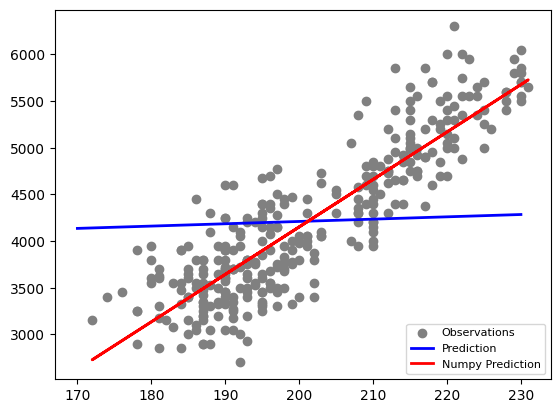

In [583]:
# Grafischer Vergleich mit und ohne Gradient descent:
plot_compare(Y_pred_gd=t_result_l001)

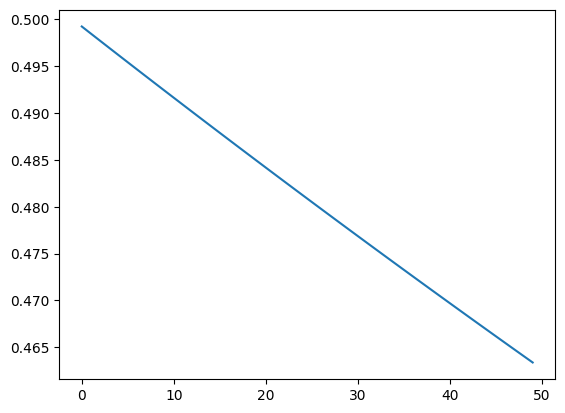

In [584]:
# Entwicklung der Kostenfunktion
plt.plot(cost_1)
plt.show()

cost_1 = []

Bei zu kleiner Schrittweite wird auch nach vielen Iterationen noch kein gutes Ergebnis erreicht. Die Regressionsgerade beschreibt die Punktwolke noch sehr schlecht und die Kostenfunktion konvergiert noch nicht.

#### Schrittweite zu groß gewählt:

In [585]:
# Setze Parameter: Learning Rate: 2, Anzahl an Iterationen = 50
m_initial = 0; b_initial = 0; num_iterations = 50; learning_rate = 2

# Führe Gradient descent Verfahren durch
m_gd, b_gd = gradient_descent(dEdm, dEdb, m_initial, b_initial,
                              X_norm, Y_norm, learning_rate, num_iterations, print_cost=True)

print(f"\nErgebnis des Gradient descent Verfahrens:\nm_opt = ", m_gd, "\nb_opt = ", b_gd)
print("\nDie zugehörige Regressionsgerade hat die Form \ny = ", b_gd, " + ", m_gd," x ")

Kosten nach Iteration 0: 0.4999999999999998
Kosten nach Iteration 1: 0.4999999999999999
Kosten nach Iteration 2: 0.4999999999999998
Kosten nach Iteration 3: 0.4999999999999999
Kosten nach Iteration 4: 0.4999999999999998
Kosten nach Iteration 5: 0.4999999999999999
Kosten nach Iteration 6: 0.5000000000000004
Kosten nach Iteration 7: 0.5000000000000004
Kosten nach Iteration 8: 0.5000000000000009
Kosten nach Iteration 9: 0.5000000000000009
Kosten nach Iteration 10: 0.500000000000001
Kosten nach Iteration 11: 0.5000000000000013
Kosten nach Iteration 12: 0.5000000000000016
Kosten nach Iteration 13: 0.5000000000000018
Kosten nach Iteration 14: 0.5000000000000021
Kosten nach Iteration 15: 0.5000000000000021
Kosten nach Iteration 16: 0.5000000000000024
Kosten nach Iteration 17: 0.5000000000000022
Kosten nach Iteration 18: 0.5000000000000024
Kosten nach Iteration 19: 0.5000000000000022
Kosten nach Iteration 20: 0.5000000000000024
Kosten nach Iteration 21: 0.5000000000000022
Kosten nach Iteration

In [586]:
# Test der Regression an ausgewählten x-Werten X_pred
t_result_l2 = test_regression(X_pred,m_gd,b_gd)

Flügellänge:
[170 180 190 200 210 220 220 230]
Vorhersage des Körpergewichts:
[4213.96604938 4213.96604938 4213.96604938 4213.96604938 4213.96604938
 4213.96604938 4213.96604938 4213.96604938]


In [587]:
# Tabelle zum Vergleich der Werte:
test_table(X_pred,t_result_l2)

  Vergleichsbereich  Mittelwert des Bereichs  geschätzter Wert
0        [165, 175]                  3275.00           4213.97
1        [175, 185]                  3453.91           4213.97
2        [185, 195]                  3619.07           4213.97
3        [195, 205]                  3956.60           4213.97
4        [205, 215]                  4706.25           4213.97
5        [215, 225]                  5243.33           4213.97
6        [215, 225]                  5243.33           4213.97
7        [225, 235]                  5589.47           4213.97


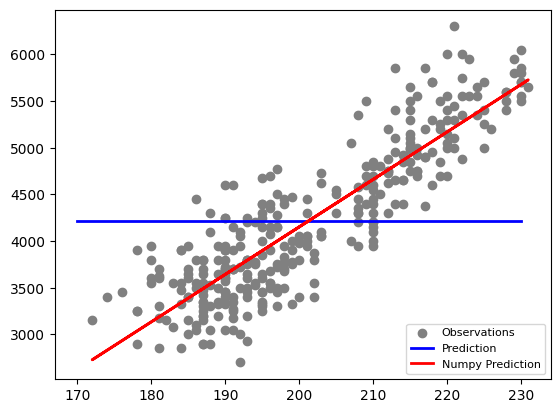

In [588]:
# Grafischer Vergleich mit und ohne Gradient descent:
plot_compare(Y_pred_gd=t_result_l2)

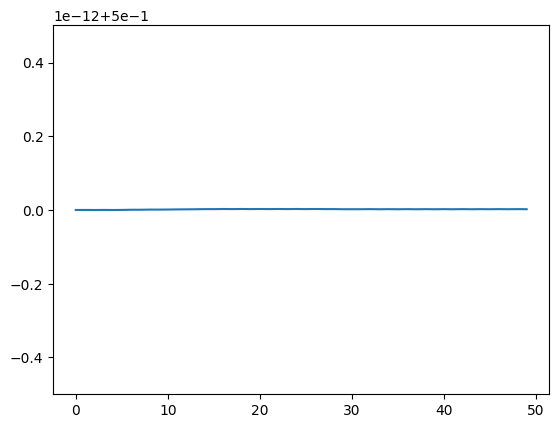

In [589]:
#Entwicklung der Kostenfunktion
plt.plot(cost_1)
plt.show()

cost_1 = []

Aufgrund der großen Learning Rate werden bei der Optimierung entscheidende Punkte übersprungen. Somit kann das Verfahren nicht konvergieren und auch bei vielen Iterationen keine guten Ergebnisse liefern.

### Zusammenhang zwischen der Wahl der Anzahl der Iterationen und der Schrittweite

Bei Wahl einer sehr kleinen Learning Rate muss die Anzahl an Iterationen entsprechen groß gewählt werden. Nur dann kann eine gute Lösung erreicht werden.

Bei Wahl einer große Lerning Rate kann bereits eine kleinere Anzahl an Iterationen reichen. Falls die Schrittweite aber zu groß gewählt ist kann unabhängig von der Wahl der Iterationsanzahl kein gutes Ergebnis erreicht werden.